In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns

import random
plt.style.use('ggplot')

## #Signup Banner 

The company adjusted the sign up banner by changing the color to brighter color , text format and so on in order to improve the sign up conversion rate. 

### **Metric : Conversion Rate**

In [3]:
df_sign = pd.read_csv('signup_conversions.csv')
df_sign.head(2)

,id,group,page,converted
0,19450,treatment,new page,no
1,13382,control,old page,no


In [49]:
df_sign['group'].value_counts()

control      2425
treatment    2095
Name: group, dtype: int64

In [50]:
df_sign['group'].value_counts(normalize=True)

control      0.536504
treatment    0.463496
Name: group, dtype: float64

In [42]:
signup_group = df_sign.groupby('group')

signup_group['converted'].value_counts()

group      converted
control    no           1810
           yes           615
treatment  no           1512
           yes           583
Name: converted, dtype: int64

In [44]:
signup_group['converted'].value_counts(normalize=True)

group      converted
control    no           0.746392
           yes          0.253608
treatment  no           0.721718
           yes          0.278282
Name: converted, dtype: float64

<AxesSubplot:xlabel='group', ylabel='count'>

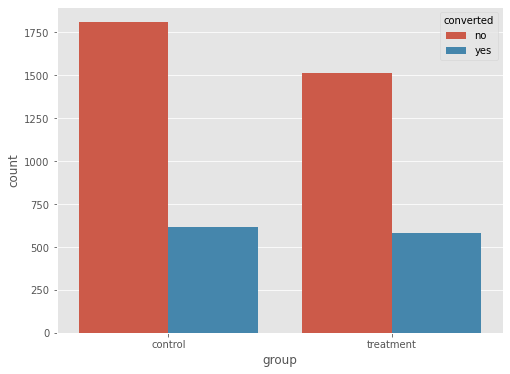

In [48]:
fig= plt.figure(figsize = (8, 6))

sns.countplot(x = 'group', data = df_sign, order = df_sign['group'].value_counts().index, hue='converted')

**Insights**

- The users in the control group are **2425** and in the treatment is **2095**.
- There is more traffic in the control group than the treatment group, about **7%** difference.
- Generally , the views are more than the clicks in both groups.


**Conversion rate of the old page**

In [4]:
old_conv = df_sign.query('page == "old page" & converted == "yes"').id.count()
old_count = df_sign.query('page == "old page"').id.count()

old_conv_rate = old_conv / old_count

print('The conversion rate of signups the old page is: {}'.format(round(old_conv_rate , 2)))

The conversion rate of signups the old page is: 0.25


**Conversion rate of the new page**

In [5]:
new_conv = df_sign.query('page == "new page" & converted == "yes"').id.count()
new_count = df_sign.query('page == "new page"').id.count()

new_conv_rate = new_conv/ new_count

print('The conversion rate of signups the new page is: {}'.format(round(new_conv_rate , 2)))

The conversion rate of signups the new page is: 0.28


**The difference between the conversion rates of the signup of the old and new pages**

In [6]:
diff_sign = new_conv_rate - old_conv_rate
print('The difference between the conversion rates of the sign up of the old and the new pages is: {}'.format(round(diff_sign , 2)))

The difference between the conversion rates of the sign up of the old and the new pages is: 0.02


**Insights**

- The sign up conversion rate of the control group is **25%**
- The sign up conversion rate of the treatment group is **28%**.
- The difference between the conversion rates of the signup for both groups is about **2%**.

At the level of significance (0.05), Do we have significant evidence to say there's a difference in the conversion rates of the old and the new page?

**Null Hypothesis** : Conversion Rate *(new)* - Conversion Rate *(old)* =< 0

**Alternative Hypothesis** : Conversion Rate *(new)* - Conversion Rate *(old)* > 0

In [7]:
diffs_sign = []

for diff in range(10000):
    b_samp = df_sign.sample(df_sign.shape[0], replace=True)
    old_conv = b_samp.query('page == "old page" & converted == "yes"').id.count()
    old_count = b_samp.query('page == "old page"').id.count()
    new_conv = b_samp.query('page == "new page" & converted == "yes"').id.count()
    new_count = b_samp.query('page == "new page"').id.count()

    new_conv_rate = new_conv / new_count
    old_conv_rate = old_conv / old_count
    
    diffs_sign.append(new_conv_rate - old_conv_rate)
len(diffs_sign)

10000

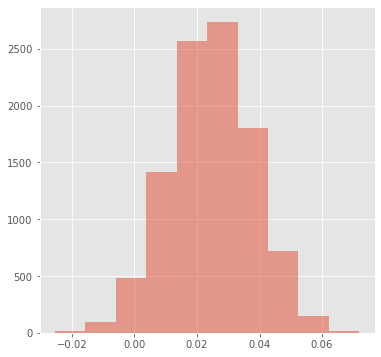

In [8]:
plt.figure(figsize=(6,6))
plt.hist(diffs_sign, alpha = 0.5);

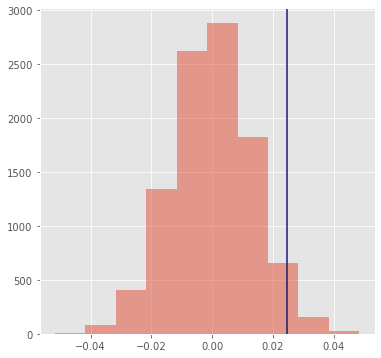

In [9]:
diff_sign_arr = np.array(diffs_sign)
null_sign_vals = np.random.normal(0, diff_sign_arr.std(), diff_sign_arr.size)


plt.figure(figsize=(6,6))
plt.hist(null_sign_vals, alpha = 0.5)
plt.axvline(x=diff_sign, color='#191970')

In [10]:
p_val = (null_sign_vals > diff_sign).mean()
p_val

0.0319

### **Conclusion**


- A p-value **0.0319** suggests with 95% confident (pre-set level of significance)  that we should reject the null hypothesis in favor of an alternative hypothesis , even though the observed difference overlaps with the region of acceptance of the null hypothesis which indicates we had made a **Type I Error** where incorrectly reject the null hypothesis when it’s actually true.

- We don't want to draw incorrect conclusions that are produced by Type I error, thusit's safer to perform the additional testing before launching anything.

- We can raise the level of statistical significance by increasing the sample size, but this requires more traffic and therefore takes more time. In the end, we have to strike a balance between the desired level of accuracy and the resources we have available.

- We may raise the level of significance to **97% - 99%** where we allow ourselves to be wrong only **3% - 1%** of the time but raise the confidence interval up to 99%  is impractical, even though we will permanently delimited this problem of Type I Error as we will confidently approving that the null hypothesis is true.

- Except that, the company doesn’t have the time and the traffic to do the experiment again, then we will doing the test again with alpha = 0.03 with 97% confidence interval, we conclude that : **since the p-value is more than the level of significant , thus we don’t have the statistical evidence to support the alternative hypothesis.**



**Is this difference practically significant?**

- Even in the business context , certainly a **2%** increment in the conversion rate of the sign up has a positive impact , but in this particular case it might have happened due to the random chance. Moreover , it is not the desired change that this business was looking for , and definitely not when the first test result itself is doutable.

## # Homepage 

The company did many adjustments in the homepage like : moving the place of the icons in the header under the search bar to the upper side, changing color and font size , and so on.

### **Metric 1 : CTR**

In [52]:
df_homepage = pd.read_csv('ecommerce_homepage_actions.csv')
df_homepage.head(2)

,id,group,page,actions
0,17259,treatment,new page,view
1,15167,control,old page,view


In [53]:
df_homepage.group.value_counts()

control      7600
treatment    6700
Name: group, dtype: int64

In [55]:
df_homepage.group.value_counts(normalize=True)

control      0.531469
treatment    0.468531
Name: group, dtype: float64

In [57]:
homepage_group = df_homepage.groupby('group')
homepage_group['actions'].value_counts()

group      actions
control    view       6744
           click       856
treatment  view       5924
           click       776
Name: actions, dtype: int64

In [58]:
homepage_group['actions'].value_counts(normalize=True)

group      actions
control    view       0.887368
           click      0.112632
treatment  view       0.884179
           click      0.115821
Name: actions, dtype: float64

<AxesSubplot:xlabel='group', ylabel='count'>

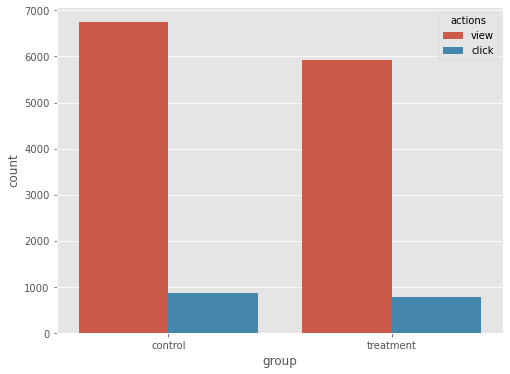

In [61]:
fig= plt.figure(figsize = (8, 6))

sns.countplot(x = 'group', data = df_homepage, order = df_homepage['group'].value_counts().index, hue='actions')

**Insights**

- The users in the control group are **7600** and in the treatment is **6700**.
- There is more traffic in the control group than the treatment group, about **7%** difference.
- Generally , the views are more than the clicks in both groups.

**Define Click Through Rate (CTR) Function**

In [172]:
def CTR_func(clicks, views):
    ctr = clicks / views
    return ctr

**Click Through Rate (CRT) Of The Old Page**

In [229]:
click_old = df_homepage.query('page == "old page" & actions == "click"').id.nunique()
view_old = df_homepage.query('page == "old page" & actions == "view"').id.nunique()
conv_rate_homepage_old = CTR_func(click_old, view_old)
print('The CTR of the old page is: {} '.format(round(conv_rate_homepage_old , 2)))

The CTR of the old page is: 0.3 


**Click Through Rate (CRT) Of The New Page**

In [230]:
click_new = df_homepage.query('page == "new page" & actions == "click"').id.nunique()
view_new = df_homepage.query('page == "new page" & actions == "view"').id.nunique()
conv_rate_homepage_new = CTR_func(click_new, view_new)
print('The CTR of the new page is: {} '.format(round(conv_rate_homepage_new , 2)))

The CTR of the new page is: 0.36 


**The Difference Between The Old & New Pages**

In [233]:
diff_homepage = conv_rate_homepage_new - conv_rate_homepage_old
print('The difference between the old and the new page is : {} '.format(round(diff_homepage , 2)))

The difference between the old and the new page is : 0.06 


**Insights**

- The click through rate of the control group is **30%**
- The click through rate of the treatment group is **36%**.
- The difference between the click through rates for both groups is about **6%**.

At the level of significance (0.05), Do we have significant evidence to say there's a difference in the CTR rates of the two page ?

**Null Hypothesis** : CTR *new* - CTR *old* =< 0

**Alternative Hypothesis** : CTR *new* - CTR *old* > 0

In [193]:
diffs_list = []

for diff in range(10000):
    b_samp = df_homepage.sample(df_homepage.shape[0], replace=True)
    click_old = b_samp.query('page == "old page" & actions == "click"').id.nunique()
    view_old = b_samp.query('page == "old page" & actions == "view"').id.nunique()
    click_new = b_samp.query('page == "new page" & actions == "click"').id.nunique()
    view_new = b_samp.query('page == "new page" & actions == "view"').id.nunique()
    conv_rate_homepage_old = CTR_func(click_old, view_old)
    conv_rate_homepage_new = CTR_func(click_new, view_new)
    
    diffs_list.append(conv_rate_homepage_new - conv_rate_homepage_old)
len(diffs_list)

10000

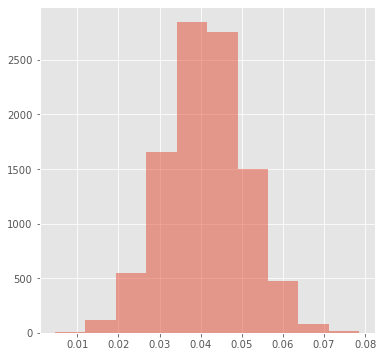

In [198]:
plt.figure(figsize=(6,6))
plt.hist(diffs_list, alpha = 0.5);

In [199]:
diff_arr = np.array(diffs_list)
null_vals = np.random.normal(0, diff_arr.std(), diff_arr.size)

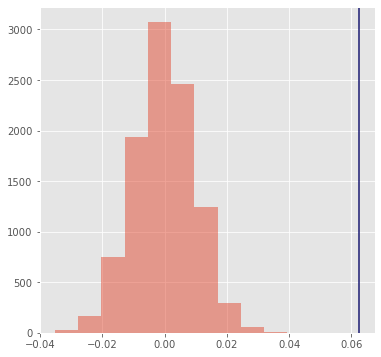

In [200]:
plt.figure(figsize=(6,6))
plt.hist(null_vals, alpha = 0.5)
plt.axvline(x=diff_homepage, color='#191970')

In [201]:
p_val = (null_vals > diff_homepage).mean()
p_val

0.0

### **Conclusion**

- As we see above the p-value of **0.0** indicates that it's highly significant and it suggests there was absolutely no chance of getting this result if the null hypothesis was true. Therefore , we reject our null in favor of an alternative hypothesis.

- With 95% confidence , there's enough statistical evidence to say that there's a difference between the CTRs of the  between new and old homepage.

**Is this difference practically significant?**

- In business perspective, **6%** uplift in the click-through-rate is a good  difference to consider , especially when the experiment ran for 2 weeks. Therefore , we can say  that the new homepage design helped in improving the CTR more than the old , in which it's very unlikely that the difference happened due to pure chance alone.

### **Metric 2 : Session Time**

Also , the company is interested to know how these adjustments impact the users' session time.

In [63]:
df_sessions = pd.read_csv('homepage_sessions.csv')
df_sessions.head(2)

,id,group,page,session_time
0,15721,control,old page,2.0
1,19228,treatment,new page,2.0


**The AVG OF The Session Time Of The Old Page**

In [218]:
avg_session_old = df_sessions.query('page == "old page"').session_time.mean()
print('The AVG of the session time of the old page is : {} minutes'.format(round(avg_session_old , 2)))

The AVG of the session time of the old page is : 1.75 minutes


**The AVG OF The Session Time Of The New Page**

In [219]:
avg_session_new = df_sessions.query('page == "new page"').session_time.mean()
print('The AVG of the session time of the new page is : {} minutes'.format(round(avg_session_new , 2)))

The AVG of the session time of the new page is : 2.25 minutes


**The Difference Between The AVGs Of The Old & New Pages**

In [220]:
diff_sess = avg_session_new - avg_session_old
print('The difference between the AVGs of the old & new pages is: {} seconds'.format(round(diff_sess , 2)))

The difference between the AVGs of the old & new pages is: 0.5 seconds


At the level of significance (0.05), Do we have significant evidence to say there's a difference in the averge session time of the two page ?

**Null Hypothesis** : AVG Session Time *(new)* - AVG Session Time *(old)* =< 0

**Alternative Hypothesis** : AVG Session Time *(new)* - AVG Session Time *(old)* > 0

In [210]:
diffs_sess_list = []

for diff in range(10000):
    b_samp = df_sessions.sample(df_sessions.shape[0], replace=True)
    avg_session_old = b_samp.query('page == "old page"').session_time.mean()
    avg_session_new = b_samp.query('page == "new page"').session_time.mean()
    diffs_sess_list.append(avg_session_new - avg_session_old)
len(diffs_sess_list)

10000

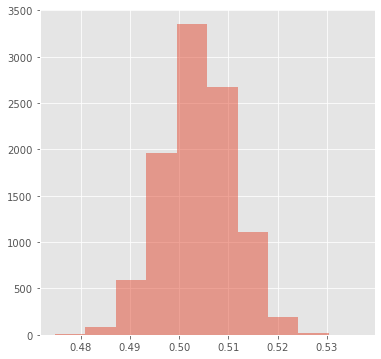

In [212]:
plt.figure(figsize=(6,6))
plt.hist(diffs_sess_list, alpha = 0.5);

In [213]:
diff_sess_arr = np.array(diffs_sess_list)
null_sess_vals = np.random.normal(0, diff_sess_arr.std(), diff_sess_arr.size)

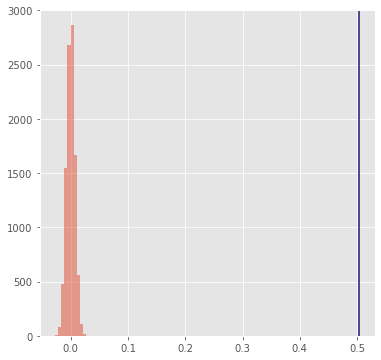

In [214]:
plt.figure(figsize=(6,6))
plt.hist(null_sess_vals, alpha = 0.5)
plt.axvline(x=diff_sess, color='#191970')

In [22]:
p_val = (null_sess_vals > diff_sess).mean()
p_val

0.0

### **Conclusion**

- As we see above the p-value of **0.0** indicates that it's highly significant and it's very unlikely that it occurred by chance alone.Therefore , we reject our null in favor of an alternative hypothesis.


- With 95% confidence, there's enough statistical evidence to say that there's a difference between the session duration of the new and old homepage.

**Is this difference practically significant?**

- Practically speaking , the new homepage slightly makes the visitors more engaging for **50 seconds** on the average and that's a sign of positive reaction.

## #Payment Methods

The company introduced new payment options in order to increase the **AOV**. Also , to observe how the users might interact with these new additions.

### **Metric : Average Order Value (AOV)**

In [78]:
df_paymnt = pd.read_csv('payment_opt.csv')
df_paymnt.head(2)

,id,group,page,payment_opt,transacions,revenue
0,11468,control,old page,PayPal,3,251.0
1,12290,control,old page,Cash On Delivery (COD),4,1052.5


In [97]:
df_paymnt['group'].value_counts()

treatment    1028
control       978
Name: group, dtype: int64

**The total transactions received during the experiment regardless of the old or new page**

In [79]:
trans_pivot = pd.pivot_table(df_paymnt, index=['group', 'page', 'payment_opt'], columns=None, values='transacions', aggfunc=np.sum)
trans_pivot.sort_values(by = 'transacions', ascending=False)

transacions
group     page     payment_opt                        
treatment new page Postpaid Methods               2166
                   Apple Pay                      1841
control   old page Credit Cards                    666
                   PayPal                          657
                   Cash On Delivery (COD)          648
treatment new page Credit Cards                    413
                   PayPal                          391
                   Cash On Delivery (COD)          350

**The total revenue received during the experiment regardless of the old or new page**

In [80]:
rev_pivot = pd.pivot_table(df_paymnt, index=['group', 'page', 'payment_opt'], columns=None, values='revenue', aggfunc=np.sum)
rev_pivot.sort_values(by = 'revenue', ascending=False)

revenue
group     page     payment_opt                     
treatment new page Postpaid Methods        898690.0
                   Apple Pay               718773.5
control   old page Credit Cards            215050.0
                   PayPal                  211368.5
                   Cash On Delivery (COD)  188163.0
treatment new page Credit Cards            169308.0
                   PayPal                  156701.0
                   Cash On Delivery (COD)  139548.5

**Ranking payment options for the control group in term of the transactions made during the last 2 weeks**

In [81]:
control_trans = df_paymnt.query('group == "control"')
group_trans = control_trans.groupby(control_trans['payment_opt'])
group_trans['transacions'].sum().sort_values(ascending = False)

payment_opt
Credit Cards              666
PayPal                    657
Cash On Delivery (COD)    648
Name: transacions, dtype: int64

**Ranking payment options for the treatment group in term of the transactions made during the last 2 weeks**

In [82]:
treatment_trans = df_paymnt.query('group == "treatment"')
group_trans = treatment_trans.groupby(treatment_trans['payment_opt'])
group_trans['transacions'].sum().sort_values(ascending = False)

payment_opt
Postpaid Methods          2166
Apple Pay                 1841
Credit Cards               413
PayPal                     391
Cash On Delivery (COD)     350
Name: transacions, dtype: int64

**Ranking payment options for the control group in term of the revenue generated during the last 2 weeks**

In [83]:
control_rev = df_paymnt.query('group == "control"')
group_rev = control_rev.groupby(control_rev['payment_opt'])
group_rev['revenue'].sum().sort_values(ascending = False)

payment_opt
Credit Cards              215050.0
PayPal                    211368.5
Cash On Delivery (COD)    188163.0
Name: revenue, dtype: float64

**Ranking payment options for the treatment group in term of the revenue generated during the last 2 weeks**

In [84]:
treatment_rev = df_paymnt.query('group == "treatment"')
group_rev = treatment_rev.groupby(treatment_rev['payment_opt'])
group_rev['revenue'].sum().sort_values(ascending = False)

payment_opt
Postpaid Methods          898690.0
Apple Pay                 718773.5
Credit Cards              169308.0
PayPal                    156701.0
Cash On Delivery (COD)    139548.5
Name: revenue, dtype: float64

Text(0.5, 1.0, 'The Control Vs. Treatment Group Payment Opts')

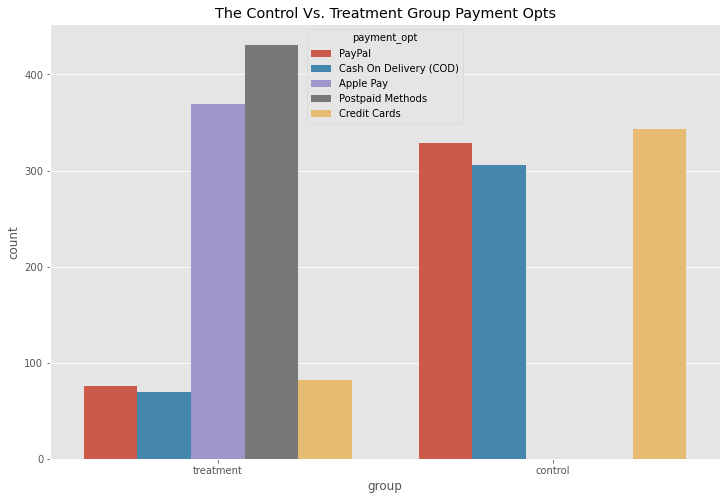

In [88]:
fig= plt.figure(figsize = (12, 8))

sns.countplot(x = 'group', data = df_paymnt, order = df_paymnt['group'].value_counts().index, hue='payment_opt')

plt.title('The Control Vs. Treatment Group Payment Opts')


**Insights**

- There is more traffic in the treatment group than the control group.
- Clearly , **postpaid methods** are trending payment options in terms of revenue and transactions made.

**The Average Order Value (AOV) of the old page**

In [69]:
trans_old = df_paymnt.query('page == "old page"').transacions.sum()
rev_old = df_paymnt.query('page == "old page"').revenue.sum()

aov_old = rev_old/trans_old

print('The Average Order Value (AOV) of the old page is: {} $'.format(round(aov_old, 1)))

The Average Order Value (AOV) of the old page is: 311.8 $


**The Average Order Value (AOV) of the new page**

In [70]:
trans_new = df_paymnt.query('page == "new page"').transacions.sum()
rev_new = df_paymnt.query('page == "new page"').revenue.sum()

aov_new = rev_new/trans_new

print('The Average Order Value (AOV) of the new page is: {} $'.format(round(aov_new, 1)))

The Average Order Value (AOV) of the new page is: 403.6 $


**The difference between the AOVs of the old & new pages**

In [71]:
diff_aov = aov_new - aov_old
print('The difference between the average order value of the old & new pages is: {}$'.format(round(diff_aov)))

The difference between the average order value of the old & new pages is: 92$


As we know **Average Order Value (AOV)** tracks the average dollar amount spent every time when a customer places an order on a website.

- The AOV of the control group is **311.8 US dollars** , while The AOV of the treament group is **403.6 US dollars**.
- The differnces of AOVs is **92 US dollars**.

At the level of significance (0.05), Do we have significant evidence to say there's a difference in the averge order value of the two page ?

**Null Hypothesis** : AOV *new* - AOV *old* =< 0

**Alternative Hypothesis** : AOV *new* - AOV *old* > 0

In [72]:
diffs_aov = []

for diff in range(10000):
    b_samp = df_paymnt.sample(df_paymnt.shape[0], replace=True)
    trans_old = b_samp.query('page == "old page"').transacions.sum()
    rev_old = b_samp.query('page == "old page"').revenue.sum()
    trans_new = b_samp.query('page == "new page"').transacions.sum()
    rev_new = b_samp.query('page == "new page"').revenue.sum()
    
    aov_old = rev_old/trans_old
    aov_new = rev_new/trans_new
    
    diffs_aov.append(aov_new - aov_old)
len(diffs_aov)

10000

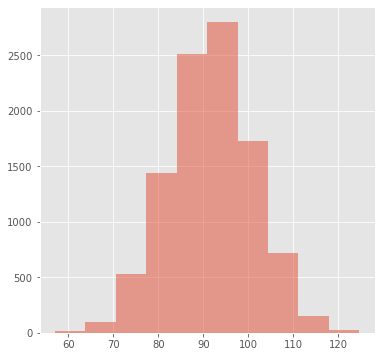

In [73]:
plt.figure(figsize=(6,6))
plt.hist(diffs_aov, alpha = 0.5);

In [74]:
diff_aov_arr = np.array(diffs_aov)
null_aov_vals = np.random.normal(0, diff_aov_arr.std(), diff_aov_arr.size)

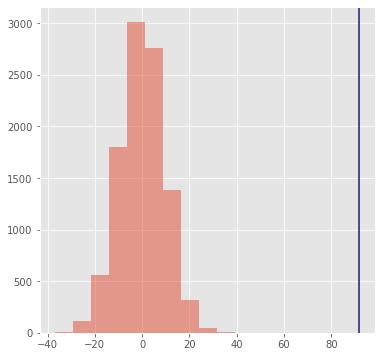

In [75]:
plt.figure(figsize=(6,6))
plt.hist(null_aov_vals, alpha = 0.5)
plt.axvline(x=diff_aov, color='#191970')

In [76]:
p_val = (null_aov_vals > diff_aov).mean()
p_val

0.0

### **Conclusion**

- A p-value of **0.0** indicates that we should reject our null hypothesis in favor of an alternative hypothesis.

- With 95% confidence, there's statistical evidence to say that there's a difference between the AOVs of the new and old payment options.

**Is this difference practically significant?**

- In a business context, this observed difference of **92 US Dollars** refers to the fact that introducing the new payment options was a good idea to grow the Average Order Value , as the customers are now spending on average **403.6 US dollars** when they place an order.

- However , we don't want to rush and draw the conclusions as we observed that most treatment users used the postpaid methods and ignored the other payment options , and that maybe what we called **the novelty effect** in which the users interact with the feature just because it’s new rather than the legitimate user interaction during an A/B test.and this of course would skew test results , in this cases it's better for run the experiment for longer time in order to allow for more time for these users to cool down from any initial positive reaction or spike of interest due to a change that was introduced as part of a treatment.

## #Product Description Pages (PDPs) 

- The company applied some adjustments to the product pages as well through changing some CTAs : like changing the names of buttons, and the direction of the product overview , ..., etc. Now they want to see if there's any difference in the visitor's behavior in terms of the engagement time with the new product pages , CTR of the purchase button.

 ### **Metric 1 : Engagement Time**

In [99]:
df_engmnt = pd.read_csv('pdp_engagement_time.csv')
df_engmnt.head(2)

,id,group,pdp_page,engagement_time
0,14514,control,old page,2.0
1,30613,treatment,new page,1.0


**The AVG engagement time of the old page**

In [242]:
avg_eng_old = df_engmnt.query('pdp_page == "old page"').engagement_time.mean()
print('The AVG of the engagement time of the old page is : {} minutes'.format(round(avg_eng_old, 1)))

The AVG of the engagement time of the old page is : 2.3 minutes


**The AVG engagement time of the new page**

In [243]:
avg_eng_new = df_engmnt.query('pdp_page == "new page"').engagement_time.mean()
print('The AVG of the engagement time of the new page is : {} minutes'.format(round(avg_eng_new, 1)))

The AVG of the engagement time of the new page is : 1.2 minutes


**The difference between the AVGs of the old & new pages**

In [244]:
diff_eng = avg_eng_new - avg_eng_old
print('The difference between the AVGs of the old & new pages is: {} minutes'.format(round(diff_eng, 1)))

The difference between the AVGs of the old & new pages is: -1.0 minutes


At the level of significance (0.05), Do we have significant evidence to say there's a difference in the averge engagement time of the two page ?

**Null Hypothesis** : AVG Engagement Time *(new)* - AVG Engagement Time *(old)* =< 0

**Alternative Hypothesis** : AVG Engagement Time *(new)* - AVG Engagement Time *(old)* > 0

In [245]:
diffs_eng = []

for diff in range(10000):
    b_samp = df_engmnt.sample(df_engmnt.shape[0], replace=True)
    avg_eng_old = b_samp.query('pdp_page == "old page"').engagement_time.mean()
    avg_eng_new = b_samp.query('pdp_page == "new page"').engagement_time.mean()
    diff_eng = avg_eng_new - avg_eng_old
    diffs_eng.append(diff_eng)
len(diffs_eng)

10000

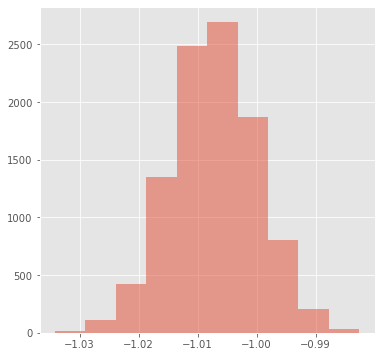

In [246]:
plt.figure(figsize=(6,6))
plt.hist(diffs_eng, alpha = 0.5);

In [247]:
diff_eng_arr = np.array(diffs_aov)
null_eng_vals = np.random.normal(0, diff_eng_arr.std(), diff_eng_arr.size)

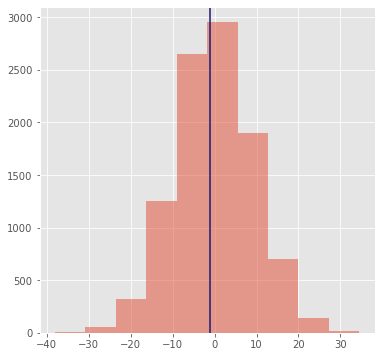

In [248]:
plt.figure(figsize=(6,6))
plt.hist(null_eng_vals, alpha = 0.5)
plt.axvline(x=diff_eng, color='#191970')

In [249]:
p_val = (null_eng_vals > diff_eng).mean()
p_val

0.5349

### **Conclusion**

-  Since the p-value of **0.5349** is more than the significant level (0.05), we failed to reject the null hypothesis. Therefore there's no statistical evidence to support the alternative hypothesis.


**Is this difference practically significant?**

- The engagement time of the product description page in the treatment declined by 1 minutes. To ensure the validity of this result , we should check the segments of the new/existing users because in some cases what lead this is what called **change aversion** is when an affectionate users engage less with the experiment , as they were used to the previous way of doing things and don’t like that their workflows got disrupted. Overtime, they will likely get used to the new design and re-engage with the brand again as usual.

### **Metric 2 : CTR Of The Purchase Btn**

In [89]:
pdp_acts = pd.read_csv('pdp_actions.csv')
pdp_acts.head(2)

,id,group,pdp_page,btn,actions
0,677618,treatment,new page,order btn,click
1,17572,control,old page,buy btn,view


In [91]:
pdp_acts['group'].value_counts()

control      2987
treatment    2322
Name: group, dtype: int64

In [92]:
pdp_acts['group'].value_counts(normalize=True)

control      0.562629
treatment    0.437371
Name: group, dtype: float64

In [93]:
group_cta = pdp_acts.groupby('group')
group_cta['actions'].value_counts()

group      actions
control    view       2847
           click       140
treatment  view       2219
           click       103
Name: actions, dtype: int64

In [94]:
group_cta['actions'].value_counts(normalize=True)

group      actions
control    view       0.953130
           click      0.046870
treatment  view       0.955642
           click      0.044358
Name: actions, dtype: float64

<AxesSubplot:xlabel='group', ylabel='count'>

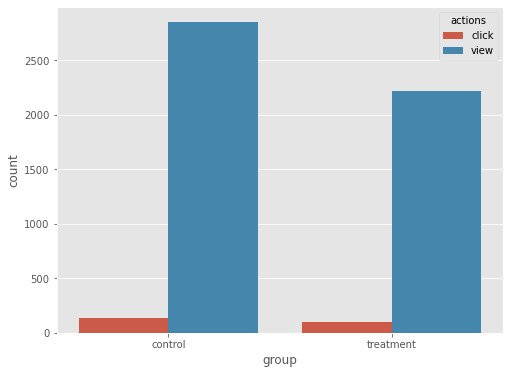

In [90]:
fig= plt.figure(figsize = (8, 6))

sns.countplot(x = 'group', data = pdp_acts, order = pdp_acts['group'].value_counts().index, hue='actions')

**Insights**

- The users in the control group are **2987** and in the treatment is **2322**.
- There is more traffic in the control group than the treatment group, about **13%** difference.
- Generally , the views are more than the clicks in both groups.

**Click-Through-Rate (CTR) of the CTA (buy btn)**

In [237]:
click_buy = pdp_acts.query('btn == "buy btn" & actions == "click"').id.nunique()
view_buy = pdp_acts.query('btn == "buy btn" & actions == "view"').id.nunique()
conv_rate_pdp_buy = CTR_func(click_buy, view_buy)
print('The CTR of the btn (buy btn) is: {}'.format(round(conv_rate_pdp_buy , 3)))

The CTR of the btn (buy btn) is: 0.049


**Click-Through-Rate (CTR) of the CTA (order btn)**

In [238]:
click_ord = pdp_acts.query('btn == "order btn" & actions == "click"').id.nunique()
view_ord = pdp_acts.query('btn == "order btn" & actions == "view"').id.nunique()
conv_rate_pdp_ord = CTR_func(click_ord, view_ord)
print('The CTR of the btn (order btn) is: {} '.format(round(conv_rate_pdp_ord , 3)))

The CTR of the btn (order btn) is: 0.046 


**The difference between the buy btn & order btn**

In [239]:
diff_cta = conv_rate_pdp_ord - conv_rate_pdp_buy
print('The difference between the buy btn and the order btn is: {}'.format(round(diff_cta , 3)))

The difference between the buy btn and the order btn is: -0.003


**Insights**

- The click through rate of the control group is **49%**
- The click through rate of the treatment group is **46%**.
- The difference between the click through rates for both groups is about **- 3%**.

At the level of significance (0.05), Do we have significant evidence to say there's a difference in the CTRs of the buy btn and order btn?

**Null Hypothesis** : CTR *(order btn)* - CTR *(buy btn)* =< 0

**Alternative Hypothesis** : CTR *(order btn)* - CTR *(buy btn)* > 0

In [240]:
diffs_cta = []

for diff in range(10000):
    b_samp = pdp_acts.sample(pdp_acts.shape[0], replace=True)
    click_buy = b_samp.query('btn == "buy btn" & actions == "click"').id.nunique()
    view_buy = b_samp.query('btn == "buy btn" & actions == "view"').id.nunique()
    click_ord = b_samp.query('btn == "order btn" & actions == "click"').id.nunique()
    view_ord = b_samp.query('btn == "order btn" & actions == "view"').id.nunique()
    
    conv_rate_pdp_buy = CTR_func(click_buy, view_buy)
    conv_rate_pdp_ord = CTR_func(click_ord, view_ord)
    
    diffs_cta.append(conv_rate_pdp_ord - conv_rate_pdp_buy)
len(diffs_cta)

10000

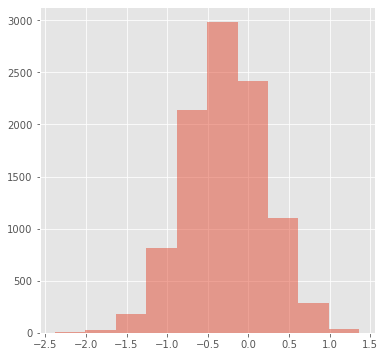

In [100]:
plt.figure(figsize=(6,6))
plt.hist(diffs_cta, alpha = 0.5);

In [101]:
diff_cta_arr = np.array(diffs_cta)
null_cta_vals = np.random.normal(0, diff_cta_arr.std(), diff_cta_arr.size)

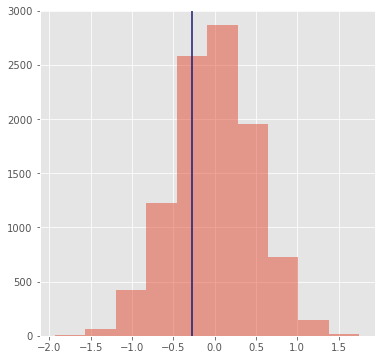

In [102]:
plt.figure(figsize=(6,6))
plt.hist(null_cta_vals, alpha = 0.5)
plt.axvline(x=diff_cta, color='#191970')

In [103]:
p_val = (null_cta_vals > diff_cta).mean()
p_val

0.7113

### **Conclusion**

-  Since the p-value of **0.7113** is more than the level of significance (0.05), we can't reject the null hypothesis. Therefore , we don't have enough statistical evidence to support our alternative hypothesis.


**Is this difference practically significant?**

- As we noticed that the pdp engagement time metric has decreased in the treatment , also the CTR of the purchase button has declined compared to the old product description page.